In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
import sys 
sys.path.append("../../")

In [5]:
from proj_mod import drop_extreme

In [6]:
from proj_mod import data_shifting

In [7]:
all_data=pd.read_csv("../../data/processed/all_data_inf_adj_collection.csv")

In [8]:
all_data.columns

Index(['Unnamed: 0', 'Date', 'fed_dff_daily',
       'ppi314_monthly_pro_change_inf_adj',
       'ppi332_monthly_pro_change_inf_adj',
       'ppi333_monthly_pro_change_inf_adj',
       'ppi334_monthly_pro_change_inf_adj',
       'ppi335_monthly_pro_change_inf_adj',
       'ppi336_monthly_pro_change_inf_adj',
       'ppi339_monthly_pro_change_inf_adj',
       'ppi516_monthly_pro_change_inf_adj',
       'ppi517_monthly_pro_change_inf_adj',
       'ppi5132_monthly_pro_change_inf_adj',
       'ppi5182_monthly_pro_change_inf_adj',
       'tech_index_20days_prior_pro_change_inf_adj',
       'cop_20days_prior_pro_change_inf_adj',
       'gold_20days_prior_pro_change_inf_adj',
       'silv_20days_prior_pro_change_inf_adj',
       'pal_20days_prior_pro_change_inf_adj',
       'plat_20days_prior_pro_change_inf_adj',
       'crude_oil_20days_prior_pro_change_inf_adj'],
      dtype='object')

In [9]:
all_data=all_data.drop("Unnamed: 0", axis=1)

In [10]:
all_data.columns

Index(['Date', 'fed_dff_daily', 'ppi314_monthly_pro_change_inf_adj',
       'ppi332_monthly_pro_change_inf_adj',
       'ppi333_monthly_pro_change_inf_adj',
       'ppi334_monthly_pro_change_inf_adj',
       'ppi335_monthly_pro_change_inf_adj',
       'ppi336_monthly_pro_change_inf_adj',
       'ppi339_monthly_pro_change_inf_adj',
       'ppi516_monthly_pro_change_inf_adj',
       'ppi517_monthly_pro_change_inf_adj',
       'ppi5132_monthly_pro_change_inf_adj',
       'ppi5182_monthly_pro_change_inf_adj',
       'tech_index_20days_prior_pro_change_inf_adj',
       'cop_20days_prior_pro_change_inf_adj',
       'gold_20days_prior_pro_change_inf_adj',
       'silv_20days_prior_pro_change_inf_adj',
       'pal_20days_prior_pro_change_inf_adj',
       'plat_20days_prior_pro_change_inf_adj',
       'crude_oil_20days_prior_pro_change_inf_adj'],
      dtype='object')

In [11]:
all_data=all_data.reindex(columns=['Date', 
       'tech_index_20days_prior_pro_change_inf_adj',
       'fed_dff_daily', 
       'ppi314_monthly_pro_change_inf_adj',
       'ppi332_monthly_pro_change_inf_adj',
       'ppi333_monthly_pro_change_inf_adj',
       'ppi334_monthly_pro_change_inf_adj',
       'ppi335_monthly_pro_change_inf_adj',
       'ppi336_monthly_pro_change_inf_adj',
       'ppi339_monthly_pro_change_inf_adj',
       'ppi516_monthly_pro_change_inf_adj',
       'ppi517_monthly_pro_change_inf_adj',
       'ppi5132_monthly_pro_change_inf_adj',
       'ppi5182_monthly_pro_change_inf_adj',
       'cop_20days_prior_pro_change_inf_adj',
       'gold_20days_prior_pro_change_inf_adj',
       'silv_20days_prior_pro_change_inf_adj',
       'pal_20days_prior_pro_change_inf_adj',
       'plat_20days_prior_pro_change_inf_adj',
       'crude_oil_20days_prior_pro_change_inf_adj'])

In [12]:
all_data.columns

Index(['Date', 'tech_index_20days_prior_pro_change_inf_adj', 'fed_dff_daily',
       'ppi314_monthly_pro_change_inf_adj',
       'ppi332_monthly_pro_change_inf_adj',
       'ppi333_monthly_pro_change_inf_adj',
       'ppi334_monthly_pro_change_inf_adj',
       'ppi335_monthly_pro_change_inf_adj',
       'ppi336_monthly_pro_change_inf_adj',
       'ppi339_monthly_pro_change_inf_adj',
       'ppi516_monthly_pro_change_inf_adj',
       'ppi517_monthly_pro_change_inf_adj',
       'ppi5132_monthly_pro_change_inf_adj',
       'ppi5182_monthly_pro_change_inf_adj',
       'cop_20days_prior_pro_change_inf_adj',
       'gold_20days_prior_pro_change_inf_adj',
       'silv_20days_prior_pro_change_inf_adj',
       'pal_20days_prior_pro_change_inf_adj',
       'plat_20days_prior_pro_change_inf_adj',
       'crude_oil_20days_prior_pro_change_inf_adj'],
      dtype='object')

In [13]:
lst_cols_shift=['tech_index_20days_prior_pro_change_inf_adj', 'fed_dff_daily',
       'ppi314_monthly_pro_change_inf_adj',
       'ppi332_monthly_pro_change_inf_adj',
       'ppi333_monthly_pro_change_inf_adj',
       'ppi334_monthly_pro_change_inf_adj',
       'ppi335_monthly_pro_change_inf_adj',
       'ppi336_monthly_pro_change_inf_adj',
       'ppi339_monthly_pro_change_inf_adj',
       'ppi516_monthly_pro_change_inf_adj',
       'ppi517_monthly_pro_change_inf_adj',
       'ppi5132_monthly_pro_change_inf_adj',
       'ppi5182_monthly_pro_change_inf_adj',
       'cop_20days_prior_pro_change_inf_adj',
       'gold_20days_prior_pro_change_inf_adj',
       'silv_20days_prior_pro_change_inf_adj',
       'pal_20days_prior_pro_change_inf_adj',
       'plat_20days_prior_pro_change_inf_adj',
       'crude_oil_20days_prior_pro_change_inf_adj']

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import LinearRegression

In [15]:
all_data

,Date,tech_index_20days_prior_pro_change_inf_adj,fed_dff_daily,ppi314_monthly_pro_change_inf_adj,ppi332_monthly_pro_change_inf_adj,ppi333_monthly_pro_change_inf_adj,ppi334_monthly_pro_change_inf_adj,ppi335_monthly_pro_change_inf_adj,ppi336_monthly_pro_change_inf_adj,ppi339_monthly_pro_change_inf_adj,ppi516_monthly_pro_change_inf_adj,ppi517_monthly_pro_change_inf_adj,ppi5132_monthly_pro_change_inf_adj,ppi5182_monthly_pro_change_inf_adj,cop_20days_prior_pro_change_inf_adj,gold_20days_prior_pro_change_inf_adj,silv_20days_prior_pro_change_inf_adj,pal_20days_prior_pro_change_inf_adj,plat_20days_prior_pro_change_inf_adj,crude_oil_20days_prior_pro_change_inf_adj
0,2014-01-02,NaN,0.08,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,1.594599,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-03,NaN,0.08,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,1.594599,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-06,NaN,0.08,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,1.594599,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-07,NaN,0.07,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,1.594599,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-08,NaN,0.07,2.446838,-0.103829,0.017017,-0.370646,-0.155464,-0.116273,-0.118845,1.594599,-0.370646,-0.478704,-0.370646,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563,2024-10-24,2.186840,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,0.823516,0.541414,0.905231,-0.102929,-2.645986,2.730603,5.925661,11.361568,3.770550,0.910874
2564,2024-10-25,2.039159,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,0.823516,0.541414,0.905231,-0.102929,-6.166548,2.570648,4.807398,13.892089,1.598315,6.069282
2565,2024-10-28,2.764371,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,0.823516,0.541414,0.905231,-0.102929,-4.889680,3.159984,6.734911,-98.798978,3.077340,-1.133477
2566,2024-10-29,3.462442,4.83,-0.668452,0.097178,0.049298,0.216057,-0.278612,0.226184,0.170434,0.823516,0.541414,0.905231,-0.102929,-4.224189,4.445636,9.329965,21.462597,7.277829,-1.529923


In [ ]:
all_data_extended = all_data.copy(deep=True)

arr_mse_kfold_collection=[] #Each row is for one int_extend. Then for each row index zero is for the training with extreme values, and index one is for the training without extreme values. 
arr_mse_kfold_de_collection=[] #Each row is for one int_extend. Then for each row index zero is for the training with extreme values, and index one is for the training without extreme values. 

for int_extend in range(4): 
    if int_extend != 0: 
        for col in lst_cols_shift: 
            all_data_extended=data_shifting.shifter(df_in=all_data_extended,str_col=col,int_shift=int_extend*20)
    all_data_extended_train=all_data_extended[all_data_extended["Date"]<"2024-01-01"].dropna()
    # all_data_extended_de=drop_extreme.drop_by_sort(df_in=all_data_extended.dropna(),fl_low=0.001,fl_high=0.999)
    # all_data_extended_train_de=drop_extreme.drop_by_sort(df_in=all_data_extended_train,fl_low=0.001,fl_high=0.999)
    # all_data_extended_test=all_data_extended[all_data_extended["Date"]>="2024-01-01"].dropna()
    X_train=all_data_extended_train.iloc[:,2:]
    y_train=all_data_extended_train.iloc[:,1]
    # X_de_train=all_data_extended_train_de.iloc[:,2:]
    # y_de_train=all_data_extended_train_de.iloc[:,1]
    # X_test=all_data_extended_test.iloc[:,2:]
    # y_test=all_data_extended_test.iloc[:,1]
    spineline_pipe = Pipeline([
    ("std", StandardScaler()),               # 1) Standardize features
    ("spline", SplineTransformer(n_knots=2, degree=1)),
    ("regressor", LinearRegression())        # 2) Fit a regression model
])

    time_kfold=TimeSeriesSplit(n_splits=5)
    fold_mse=[]
    fold_mse_de=[]
    #First for without deleting extreme values. 
    for index_train, index_test in time_kfold.split(X_train): 
        X_tt=X_train.iloc[index_train]
        y_tt=y_train.iloc[index_train]
        X_ho=X_train.iloc[index_test]
        y_ho=y_train.iloc[index_test]
        all_data_ho_de=drop_extreme.drop_by_sort(df_in=all_data_extended_train.iloc[index_test], fl_low=0.01, fl_high=0.99)
        X_ho_de=all_data_ho_de.iloc[:,2:]
        y_ho_de=all_data_ho_de.iloc[:,1]
        spineline_pipe.fit(X=X_tt,y=y_tt)
        pred=spineline_pipe.predict(X=X_ho)
        error=mean_squared_error(y_pred=pred,y_true=y_ho)
        fold_mse.append(error)
        pred_de=spineline_pipe.predict(X=X_ho_de)
        error_de=mean_squared_error(y_pred=pred_de,y_true=y_ho_de)
        fold_mse_de.append(error_de)
    mean_error=np.mean(fold_mse)
    arr_mse_kfold_collection.append([])
    arr_mse_kfold_collection[-1].append(mean_error)
    mean_error_de=np.mean(fold_mse_de)
    arr_mse_kfold_de_collection.append([])
    arr_mse_kfold_de_collection[-1].append(mean_error_de)
    print("mse trained on "+str(int_extend)+" index shifting and WITHOUT deleting extreme values is "+str(mean_error)+" with k fold.")
    fold_mse=[]
    fold_mse_de=[]
    #Then the one with deleting extreme values. 
    for index_train, index_test in time_kfold.split(X_train): 
        all_data_tt=drop_extreme.drop_by_sort(df_in=all_data_extended_train.iloc[index_train], fl_low=0.001, fl_high=0.999)  #all_data_extended_train.iloc[index_train]
        all_data_ho=drop_extreme.drop_by_sort(df_in=all_data_extended_train.iloc[index_test], fl_low=0.01, fl_high=0.99) #all_data_extended_train.iloc[index_test]
        X_tt=all_data_tt.iloc[:,2:] #drop_extreme.drop_by_sort(df_in=X_train.iloc[index_train], fl_low=0.01, fl_high=0.99)     #X_de_train.iloc[index_train]
        y_tt=all_data_tt.iloc[:,1] #drop_extreme.drop_by_sort(df_in=y_train.iloc[index_train], fl_low=0.01, fl_high=0.99) 
        X_ho_de=all_data_ho.iloc[:,2:] #drop_extreme.drop_by_sort(df_in=X_train.iloc[index_test], fl_low=0.01, fl_high=0.99) #X_train.iloc[index_test]
        y_ho_de=all_data_ho.iloc[:,1] #drop_extreme.drop_by_sort(df_in=y_train.iloc[index_test], fl_low=0.01, fl_high=0.99) #y_train.iloc[index_test]
        X_ho=X_train.iloc[index_test]
        y_ho=y_train.iloc[index_test]
        spineline_pipe.fit(X=X_tt,y=y_tt)
        pred=spineline_pipe.predict(X=X_ho)
        error=mean_squared_error(y_pred=pred,y_true=y_ho)
        fold_mse.append(error)
        pred_de=spineline_pipe.predict(X=X_ho_de)
        error_de=mean_squared_error(y_pred=pred_de,y_true=y_ho_de)
        fold_mse_de.append(error_de)
    mean_error=np.mean(fold_mse)
    arr_mse_kfold_collection[-1].append(mean_error)
    mean_error_de=np.mean(fold_mse_de)
    arr_mse_kfold_de_collection[-1].append(mean_error_de)
    print("mse trained on "+str(int_extend)+" index shifting and WITH deleting extreme values is "+str(mean_error)+" with k fold.")
    print("\n"+"Finished training and testing for "+str(int_extend)+" shiftings.")

mse trained on 0 index shifting and WITHOUT deleting extreme values is 33.894983104275774 with k fold.
mse trained on 0 index shifting and WITH deleting extreme values is 33.377248684416614 with k fold.

Finished training and testing for 0 shiftings.
mse trained on 1 index shifting and WITHOUT deleting extreme values is 49.62771103379488 with k fold.
mse trained on 1 index shifting and WITH deleting extreme values is 49.144663035843884 with k fold.

Finished training and testing for 1 shiftings.
mse trained on 2 index shifting and WITHOUT deleting extreme values is 65.66331054248842 with k fold.
mse trained on 2 index shifting and WITH deleting extreme values is 65.92692736044691 with k fold.

Finished training and testing for 2 shiftings.
mse trained on 3 index shifting and WITHOUT deleting extreme values is 73.14825055873455 with k fold.
mse trained on 3 index shifting and WITH deleting extreme values is 75.49343642478338 with k fold.

Finished training and testing for 3 shiftings.


In [17]:
arr_mse_kfold_collection

[[np.float64(33.894983104275774), np.float64(33.377248684416614)],
 [np.float64(49.62771103379488), np.float64(49.144663035843884)],
 [np.float64(65.66331054248842), np.float64(65.92692736044691)],
 [np.float64(73.14825055873455), np.float64(75.49343642478338)]]

In [18]:
arr_mse_kfold_de_collection

[[np.float64(30.41430156712179), np.float64(29.82672081366683)],
 [np.float64(42.05313619584691), np.float64(41.287664218388855)],
 [np.float64(53.784462285867264), np.float64(54.19156357608873)],
 [np.float64(55.829534917023715), np.float64(57.15051873303512)]]

In [19]:
arr_in=np.array(arr_mse_kfold_de_collection).transpose()

In [20]:
np.array(arr_mse_kfold_collection).transpose()

array([[33.8949831 , 49.62771103, 65.66331054, 73.14825056],
       [33.37724868, 49.14466304, 65.92692736, 75.49343642]])

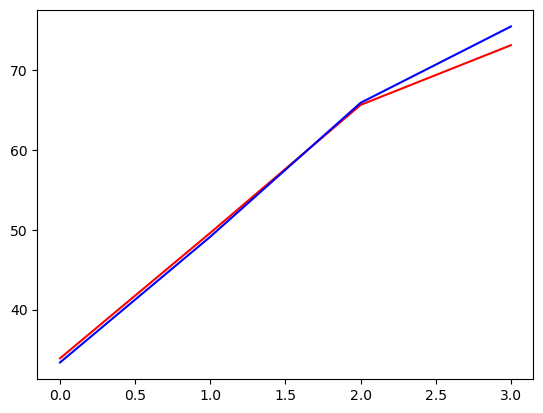

In [21]:
plt.plot(np.array(arr_mse_kfold_collection).transpose()[0], c="r",label="Trained with extreme")
plt.plot(np.array(arr_mse_kfold_collection).transpose()[1], c="b",label="Trained without extreme")
plt.show()

We should take no shifting for both with and without extreme. 

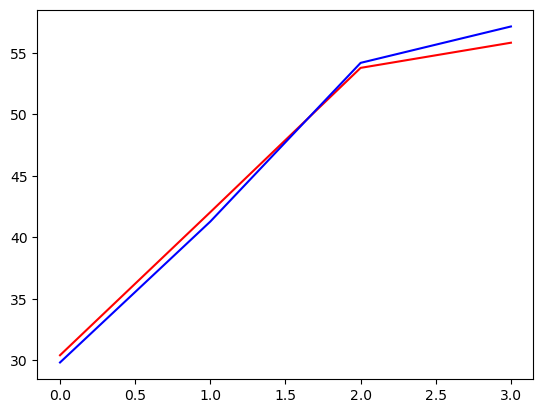

In [22]:
plt.plot(arr_in[0], c="r",label="Trained with extreme")
plt.plot(arr_in[1], c="b",label="Trained without extreme")
plt.show()

Seems 4 shifts works better with tested without extreme values. 

In [23]:
all_data_extended = all_data.copy(deep=True)

In [24]:
all_data_extended_train=all_data_extended[all_data_extended["Date"]<"2024-01-01"].dropna()

In [25]:
# all_data_extended_de=drop_extreme.drop_by_sort(df_in=all_data_extended.dropna(),fl_low=0.001,fl_high=0.999)
all_data_extended_train_de=drop_extreme.drop_by_sort(df_in=all_data_extended_train,fl_low=0.001,fl_high=0.999)
all_data_extended_test=all_data_extended[all_data_extended["Date"]>="2024-01-01"].dropna()

In [26]:
all_data_extended_test_de=drop_extreme.drop_by_sort(df_in=all_data_extended_test,fl_low=0.01,fl_high=0.99)

In [27]:
X_train=all_data_extended_train.iloc[:,2:]
y_train=all_data_extended_train.iloc[:,1]
X_de_train=all_data_extended_train_de.iloc[:,2:]
y_de_train=all_data_extended_train_de.iloc[:,1]
X_test=all_data_extended_test.iloc[:,2:]
y_test=all_data_extended_test.iloc[:,1]
X_de_test=all_data_extended_test_de.iloc[:,2:]
y_de_test=all_data_extended_test_de.iloc[:,1]

First the one trained without extreme values. 

In [28]:
spineline_pipe = Pipeline([
    ("std", StandardScaler()),               # 1) Standardize features
    ("spline", SplineTransformer(n_knots=2, degree=1)),
    ("regressor", LinearRegression())        # 2) Fit a regression model
])

In [ ]:
spineline_pipe.fit(X=X_de_train,y=y_de_train)

Pipeline(steps=[('std', StandardScaler()),
                ('spline', SplineTransformer(degree=1, n_knots=2)),
                ('regressor', LinearRegression())])

In [30]:
pred_extreme=spineline_pipe.predict(X=X_test)

In [31]:
pred_noextreme=spineline_pipe.predict(X_de_test)

Graph for training without extreme, test with extreme. 

In [32]:
mean_squared_error(y_pred=pred_extreme,y_true=y_test)

25.518053545397255

<function matplotlib.pyplot.show(close=None, block=None)>

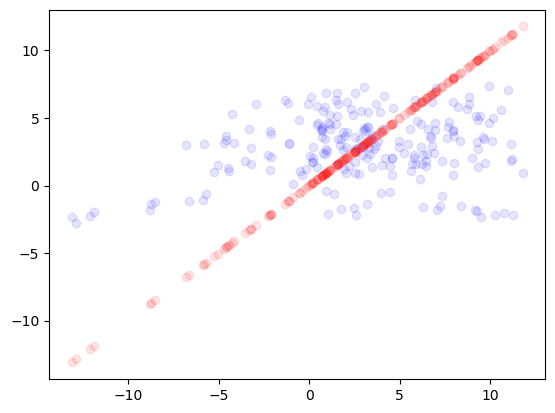

In [33]:
plt.scatter(x=y_test,y=pred_extreme,c="b",alpha=0.1,label="pred")
plt.scatter(x=y_test,y=y_test,c="r",alpha=0.1,label="true")
plt.show

Graph for training without extreme, test without extreme. 

In [34]:
mean_squared_error(y_pred=pred_noextreme,y_true=y_de_test)

22.92451268912475

<function matplotlib.pyplot.show(close=None, block=None)>

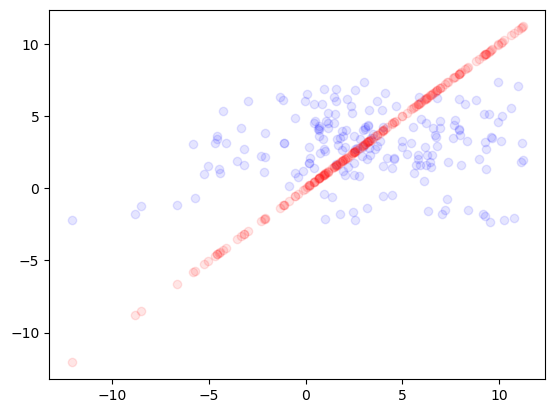

In [35]:
plt.scatter(x=y_de_test,y=pred_noextreme,c="b",alpha=0.1,label="pred")
plt.scatter(x=y_de_test,y=y_de_test,c="r",alpha=0.1,label="true")
plt.show

In [36]:
fo_feat=[[11],[10],[0],[12],[13],[6],[14],[7],[2],[5],[4],[3],[17],[5,17],[3,16]]
feat_cols=X_train.columns

print("The focused features, in order of importance are:"+"\n")
for lst_feats in fo_feat: 
    for ind in lst_feats: 
        print(feat_cols[ind])
    print("----------------------------------"+"\n")

The focused features, in order of importance are:

ppi5182_monthly_pro_change_inf_adj
----------------------------------

ppi5132_monthly_pro_change_inf_adj
----------------------------------

fed_dff_daily
----------------------------------

cop_20days_prior_pro_change_inf_adj
----------------------------------

gold_20days_prior_pro_change_inf_adj
----------------------------------

ppi336_monthly_pro_change_inf_adj
----------------------------------

silv_20days_prior_pro_change_inf_adj
----------------------------------

ppi339_monthly_pro_change_inf_adj
----------------------------------

ppi332_monthly_pro_change_inf_adj
----------------------------------

ppi335_monthly_pro_change_inf_adj
----------------------------------

ppi334_monthly_pro_change_inf_adj
----------------------------------

ppi333_monthly_pro_change_inf_adj
----------------------------------

crude_oil_20days_prior_pro_change_inf_adj
----------------------------------

ppi335_monthly_pro_change_inf_adj
crude_o

Actually not too bad if you look at the graphs. 

Then, the one trained with extreme values. 

In [37]:
spineline_pipe = Pipeline([
    ("std", StandardScaler()),               # 1) Standardize features
    ("spline", SplineTransformer(n_knots=2, degree=1)),
    ("regressor", LinearRegression())        # 2) Fit a regression model
])

In [38]:
spineline_pipe.fit(X=X_train,y=y_train)

Pipeline(steps=[('std', StandardScaler()),
                ('spline', SplineTransformer(degree=1, n_knots=2)),
                ('regressor', LinearRegression())])

In [39]:
pred_extreme=spineline_pipe.predict(X=X_test)

In [40]:
pred_noextreme=spineline_pipe.predict(X_de_test)

The graph for training with extreme, test with extreme: 

In [41]:
mean_squared_error(y_pred=pred_extreme,y_true=y_test)

25.75188834708212

<function matplotlib.pyplot.show(close=None, block=None)>

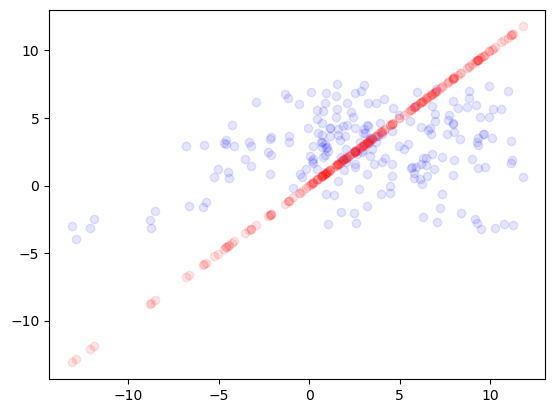

In [42]:
plt.scatter(x=y_test,y=pred_extreme,c="b",alpha=0.1)
plt.scatter(x=y_test,y=y_test,c="r",alpha=0.1)
plt.show

The graph for training with extreme, test without extreme: 

In [43]:
mean_squared_error(y_pred=pred_noextreme,y_true=y_de_test)

23.327792137507924

<function matplotlib.pyplot.show(close=None, block=None)>

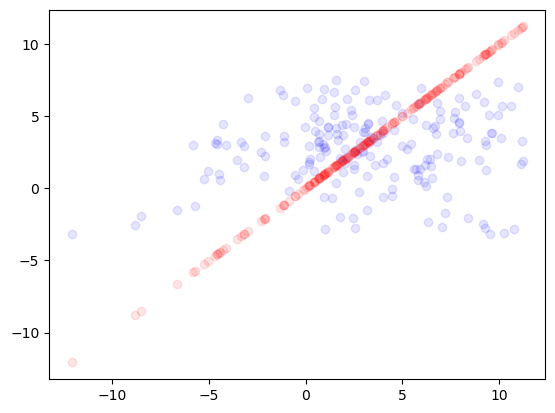

In [44]:
plt.scatter(x=y_de_test,y=pred_noextreme,c="b",alpha=0.1)
plt.scatter(x=y_de_test,y=y_de_test,c="r",alpha=0.1)
plt.show

In [45]:
fo_feat=[[11],[10],[12],[0],[13],[6],[14],[2],[5],[4],[7],[3],[17],[0,13],[11,13]]
feat_cols=X_train.columns

print("The focused features, in order of importance are:"+"\n")
for lst_feats in fo_feat: 
    for ind in lst_feats: 
        print(feat_cols[ind])
    print("----------------------------------"+"\n")

The focused features, in order of importance are:

ppi5182_monthly_pro_change_inf_adj
----------------------------------

ppi5132_monthly_pro_change_inf_adj
----------------------------------

cop_20days_prior_pro_change_inf_adj
----------------------------------

fed_dff_daily
----------------------------------

gold_20days_prior_pro_change_inf_adj
----------------------------------

ppi336_monthly_pro_change_inf_adj
----------------------------------

silv_20days_prior_pro_change_inf_adj
----------------------------------

ppi332_monthly_pro_change_inf_adj
----------------------------------

ppi335_monthly_pro_change_inf_adj
----------------------------------

ppi334_monthly_pro_change_inf_adj
----------------------------------

ppi339_monthly_pro_change_inf_adj
----------------------------------

ppi333_monthly_pro_change_inf_adj
----------------------------------

crude_oil_20days_prior_pro_change_inf_adj
----------------------------------

fed_dff_daily
gold_20days_prior_pro_chang

Not very bad again if you look at the graph. 

It seems more sifting does cause worse effect on whole test set, but it also seems to reduce error in the test set with no extreme values, let's try that out as well. 

In [46]:
all_data_extended = all_data.copy(deep=True)
for int_extend in range(4): 
    if int_extend != 0: 
        for col in lst_cols_shift: 
            all_data_extended=data_shifting.shifter(df_in=all_data_extended,str_col=col,int_shift=int_extend*20)
all_data_extended_train=all_data_extended[all_data_extended["Date"]<"2024-01-01"].dropna()
all_data_extended_train_de=drop_extreme.drop_by_sort(df_in=all_data_extended_train,fl_low=0.001,fl_high=0.999)
all_data_extended_test=all_data_extended[all_data_extended["Date"]>="2024-01-01"].dropna()
all_data_extended_test_de=drop_extreme.drop_by_sort(df_in=all_data_extended_test,fl_low=0.01,fl_high=0.99)
X_train=all_data_extended_train.iloc[:,2:]
y_train=all_data_extended_train.iloc[:,1]
X_de_train=all_data_extended_train_de.iloc[:,2:]
y_de_train=all_data_extended_train_de.iloc[:,1]
X_test=all_data_extended_test.iloc[:,2:]
y_test=all_data_extended_test.iloc[:,1]
X_de_test=all_data_extended_test_de.iloc[:,2:]
y_de_test=all_data_extended_test_de.iloc[:,1]

First train without extreme values. 

In [47]:
spineline_pipe = Pipeline([
    ("std", StandardScaler()),                  # standardize features
    ("spline", SplineTransformer(n_knots=2, degree=1)),
    ("regressor", LinearRegression())           # final estimator
])
spineline_pipe.fit(X=X_de_train,y=y_de_train)
pred_extreme=spineline_pipe.predict(X=X_test)
mse_extreme=mean_squared_error(y_pred=pred_extreme,y_true=y_test)
pred_noextreme=spineline_pipe.predict(X=X_de_test)
mse_noextreme=mean_squared_error(y_pred=pred_noextreme,y_true=y_de_test)

Test on test set with extreme value: 

In [48]:
mse_extreme

42.00448281729663

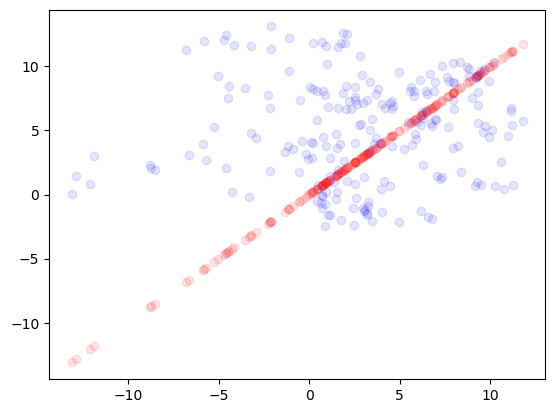

In [49]:
plt.scatter(x=y_test,y=y_test,c="r",alpha=0.1,label="true")
plt.scatter(x=y_test,y=pred_extreme,c="b",alpha=0.1,label="pred")
plt.show()

Test on test set without extreme value: 

In [50]:
mse_noextreme

41.35163723578369

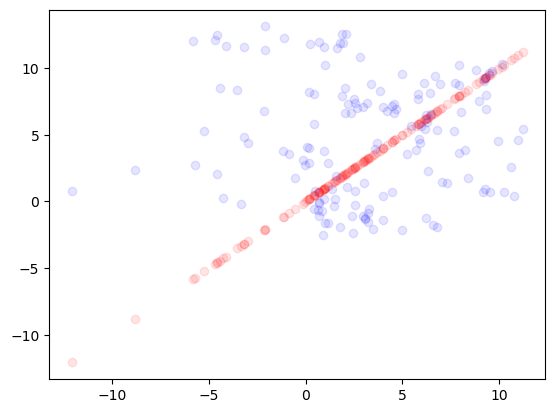

In [51]:
plt.scatter(x=y_de_test,y=y_de_test,c="r",alpha=0.1,label="true")
plt.scatter(x=y_de_test,y=pred_noextreme,c="b",alpha=0.1,label="pred")
plt.show()

In [52]:
fo_feat=[[18],[12],[19],[37],[13],[11],[17],[16],[10],[66],[55],[45],[67],[40],[57]]
feat_cols=X_train.columns

print("The focused features, in order of importance are:"+"\n")
for lst_feats in fo_feat: 
    for ind in lst_feats: 
        print(feat_cols[ind])
    print("----------------------------------"+"\n")

The focused features, in order of importance are:

tech_index_20days_prior_pro_change_inf_adj_shifted_by_20
----------------------------------

cop_20days_prior_pro_change_inf_adj
----------------------------------

fed_dff_daily_shifted_by_20
----------------------------------

tech_index_20days_prior_pro_change_inf_adj_shifted_by_40
----------------------------------

gold_20days_prior_pro_change_inf_adj
----------------------------------

ppi5182_monthly_pro_change_inf_adj
----------------------------------

crude_oil_20days_prior_pro_change_inf_adj
----------------------------------

plat_20days_prior_pro_change_inf_adj
----------------------------------

ppi5132_monthly_pro_change_inf_adj
----------------------------------

ppi517_monthly_pro_change_inf_adj_shifted_by_60
----------------------------------

crude_oil_20days_prior_pro_change_inf_adj_shifted_by_40
----------------------------------

ppi339_monthly_pro_change_inf_adj_shifted_by_40
----------------------------------

p

Seems to have a better "trend". 

Then train with extreme values.

In [53]:
spineline_pipe = Pipeline([
    ("std", StandardScaler()),                  # standardize features
    ("spline", SplineTransformer(n_knots=2, degree=1)),
    ("regressor", LinearRegression())           # final estimator
])
spineline_pipe.fit(X=X_train,y=y_train)
pred_extreme=spineline_pipe.predict(X=X_test)
mse_extreme=mean_squared_error(y_pred=pred_extreme,y_true=y_test)
pred_noextreme=spineline_pipe.predict(X=X_de_test)
mse_noextreme=mean_squared_error(y_pred=pred_noextreme,y_true=y_de_test)

Test without extreme value: 

In [54]:
mse_extreme

44.7825778654072

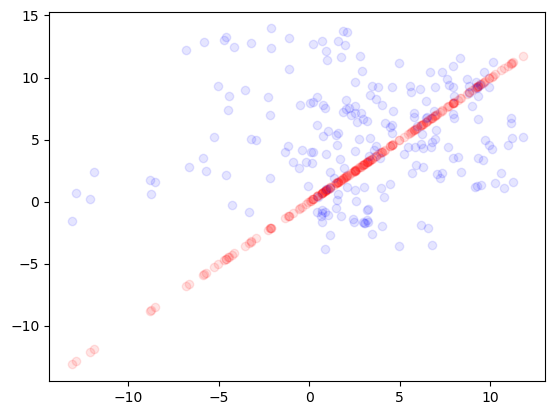

In [55]:
plt.scatter(x=y_test,y=y_test,c="r",alpha=0.1,label="true")
plt.scatter(x=y_test,y=pred_extreme,c="b",alpha=0.1,label="pred")
plt.show()

Test with extreme value: 

In [56]:
mse_noextreme

44.91056051735737

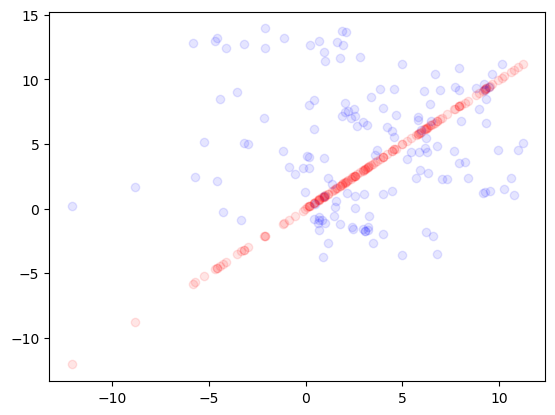

In [57]:
plt.scatter(x=y_de_test,y=y_de_test,c="r",alpha=0.1,label="true")
plt.scatter(x=y_de_test,y=pred_noextreme,c="b",alpha=0.1,label="pred")
plt.show()

In [58]:
fo_feat=[[18],[12],[19],[37],[13],[17],[11],[16],[10],[66],[55],[45],[40],[67],[73]]
feat_cols=X_train.columns

print("The focused features, in order of importance are:"+"\n")
for lst_feats in fo_feat: 
    for ind in lst_feats: 
        print(feat_cols[ind])
    print("----------------------------------"+"\n")

The focused features, in order of importance are:

tech_index_20days_prior_pro_change_inf_adj_shifted_by_20
----------------------------------

cop_20days_prior_pro_change_inf_adj
----------------------------------

fed_dff_daily_shifted_by_20
----------------------------------

tech_index_20days_prior_pro_change_inf_adj_shifted_by_40
----------------------------------

gold_20days_prior_pro_change_inf_adj
----------------------------------

crude_oil_20days_prior_pro_change_inf_adj
----------------------------------

ppi5182_monthly_pro_change_inf_adj
----------------------------------

plat_20days_prior_pro_change_inf_adj
----------------------------------

ppi5132_monthly_pro_change_inf_adj
----------------------------------

ppi517_monthly_pro_change_inf_adj_shifted_by_60
----------------------------------

crude_oil_20days_prior_pro_change_inf_adj_shifted_by_40
----------------------------------

ppi339_monthly_pro_change_inf_adj_shifted_by_40
----------------------------------

p

Seems to have better "trend" as well. 